## User Behavior Class Characteristics ##
   User Behavior Class  App Usage Time (min/day)  Screen On Time (hours/day)  \
0                    1                 60.426471                    1.490441   
1                    2                131.972603                    3.037671   
2                    3                235.398601                    4.955944   
3                    4                395.748201                    6.909353   
4                    5                541.419118                   10.114706   

   Battery Drain (mAh/day)  Data Usage (MB/day)   Age  
0               454.977941           202.323529  37.0  
1               883.808219           451.417808  39.0  
2              1515.055944           822.013986  38.0  
3              2105.805755          1232.230216  40.0  
4              2701.014706          1974.772059  37.0  


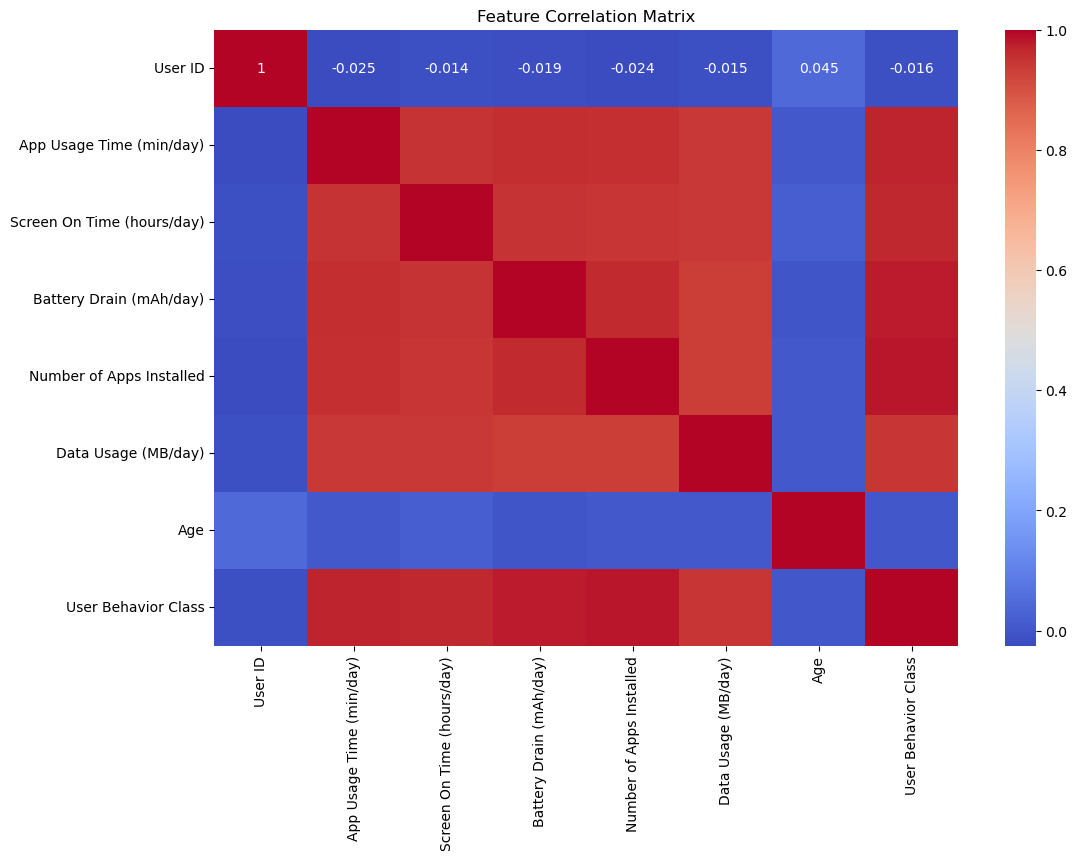

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load data
df = pd.read_csv('user_behavior_dataset.csv')

# Behavioral segmentation analysis
behavior_analysis = df.groupby('User Behavior Class').agg({
    'App Usage Time (min/day)': 'mean',
    'Screen On Time (hours/day)': 'mean',
    'Battery Drain (mAh/day)': 'mean',
    'Data Usage (MB/day)': 'mean',
    'Age': 'median'
}).reset_index()

print("## User Behavior Class Characteristics ##")
print(behavior_analysis)

# Visualization
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()



## Model Performance ##
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



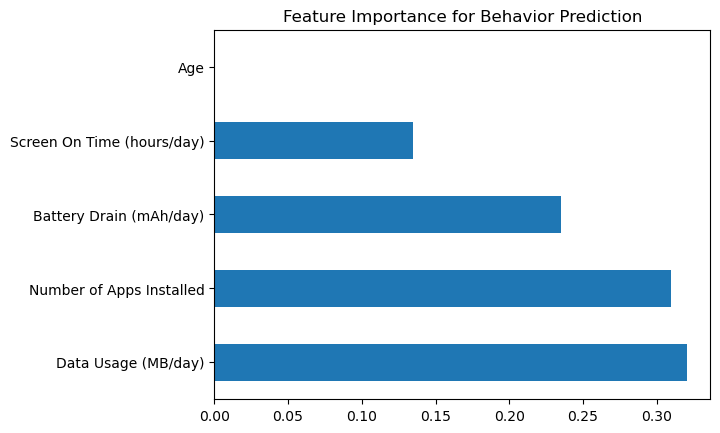

In [2]:
# Prepare data for modeling
X = df[['Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 
        'Number of Apps Installed', 'Age', 'Data Usage (MB/day)']]
y = df['User Behavior Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Evaluate model
predictions = rf.predict(X_test)
print("\n## Model Performance ##")
print(classification_report(y_test, predictions))

# Feature importance
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('Feature Importance for Behavior Prediction')
plt.show()



## Technology Platform Analysis ##
         Device Model Operating System  App Usage Time (min/day)  \
4           iPhone 12              iOS                     257.5   
1           OnePlus 9          Android                     216.0   
2  Samsung Galaxy S21          Android                     217.0   
3        Xiaomi Mi 11          Android                     217.0   
0      Google Pixel 5          Android                     231.5   

   User Behavior Class  Number of Apps Installed  
4             3.102740                        99  
1             2.977444                        99  
2             2.977444                        99  
3             2.972603                        98  
0             2.915493                        99  


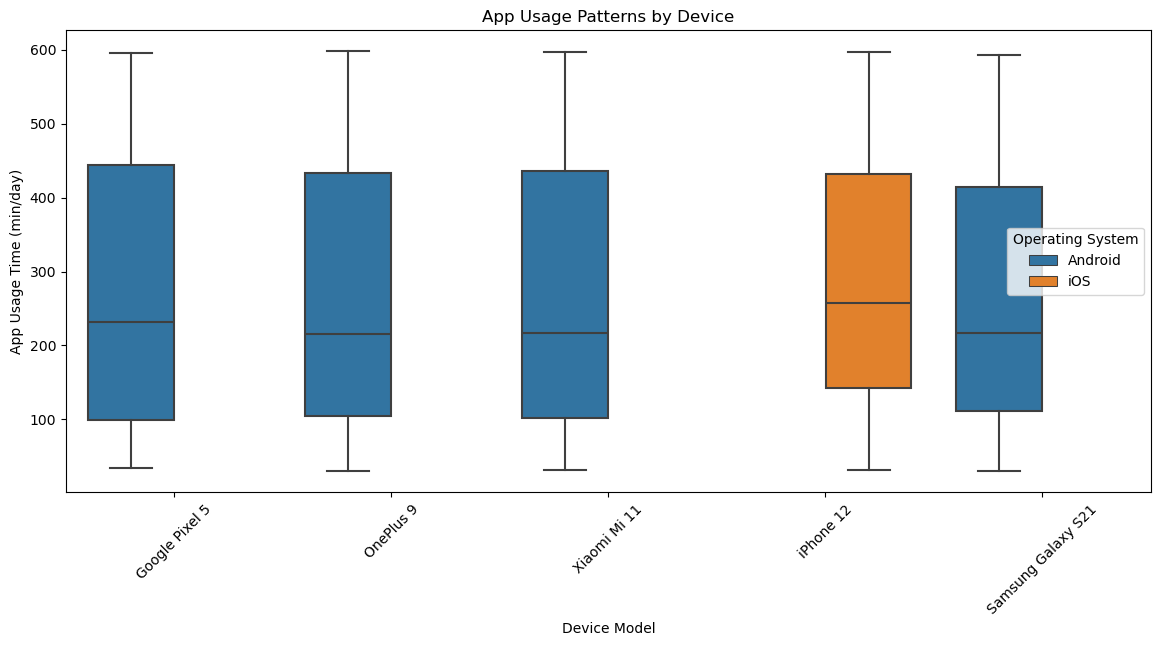

In [3]:
# Device and OS analysis
tech_analysis = df.groupby(['Device Model', 'Operating System']).agg({
    'App Usage Time (min/day)': 'median',
    'User Behavior Class': 'mean',
    'Number of Apps Installed': 'max'
}).reset_index()

print("\n## Technology Platform Analysis ##")
print(tech_analysis.sort_values('User Behavior Class', ascending=False))

# Engagement patterns by device
plt.figure(figsize=(14,6))
sns.boxplot(x='Device Model', y='App Usage Time (min/day)', hue='Operating System', data=df)
plt.title('App Usage Patterns by Device')
plt.xticks(rotation=45)
plt.show()



## Battery Consumption Patterns ##
  User Behavior Class Battery Drain (mAh/day)              \
                                         mean         std   
0                   1              454.977941   89.214470   
1                   2              883.808219  186.565670   
2                   3             1515.055944  167.323873   
3                   4             2105.805755  169.510928   
4                   5             2701.014706  176.912784   

  Screen On Time (hours/day)  
                      median  
0                        1.5  
1                        3.1  
2                        4.9  
3                        6.9  
4                       10.3  


<Figure size 1200x600 with 0 Axes>

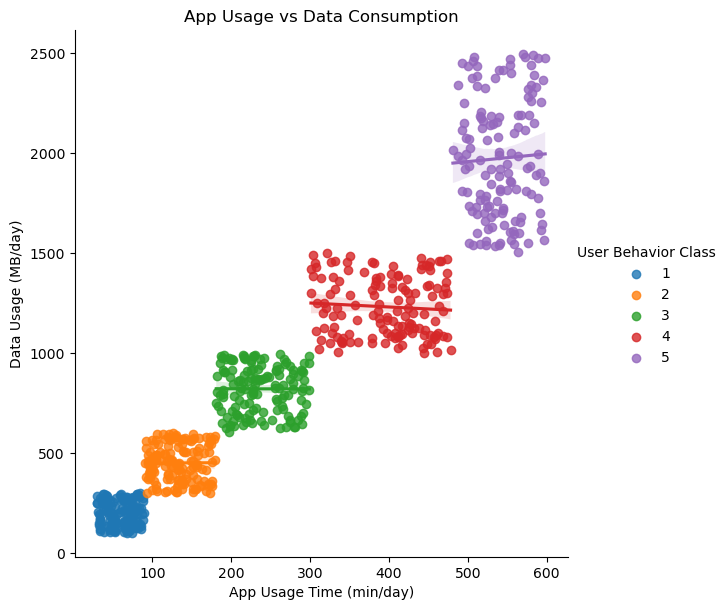


Battery Consumption R²: 0.95


In [4]:
# Battery analysis
battery_analysis = df.groupby('User Behavior Class').agg({
    'Battery Drain (mAh/day)': ['mean', 'std'],
    'Screen On Time (hours/day)': 'median'
}).reset_index()

print("\n## Battery Consumption Patterns ##")
print(battery_analysis)

# Data usage trends
plt.figure(figsize=(12,6))
sns.lmplot(x='App Usage Time (min/day)', y='Data Usage (MB/day)', 
           hue='User Behavior Class', data=df, height=6)
plt.title('App Usage vs Data Consumption')
plt.show()

# Multivariate regression analysis
from sklearn.linear_model import LinearRegression
X_battery = df[['Screen On Time (hours/day)', 'Number of Apps Installed', 'App Usage Time (min/day)']]
y_battery = df['Battery Drain (mAh/day)']

battery_model = LinearRegression().fit(X_battery, y_battery)
print(f"\nBattery Consumption R²: {battery_model.score(X_battery, y_battery):.2f}")
